In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

benin = pd.read_csv('../../data/benin-malanville_clean.csv', parse_dates=['Timestamp'])
sierra = pd.read_csv('../../data/sierraleone_clean.csv', parse_dates=['Timestamp'])
togo  = pd.read_csv('../../data/togo_clean.csv', parse_dates=['Timestamp'])

# Tag each
benin['country'] = 'Benin'
sierra['country'] = 'Sierra Leone'
togo['country']   = 'Togo'

df = pd.concat([benin, sierra, togo], ignore_index=True)


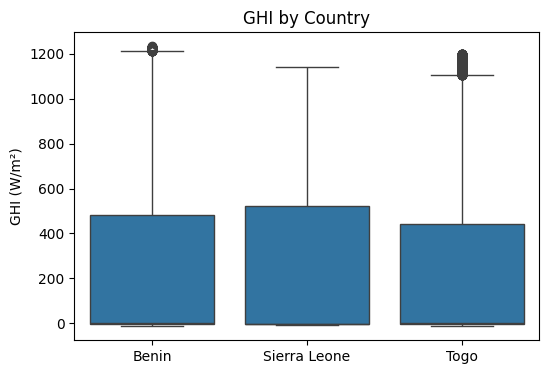

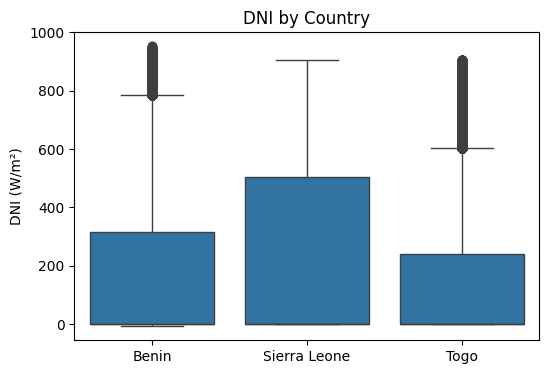

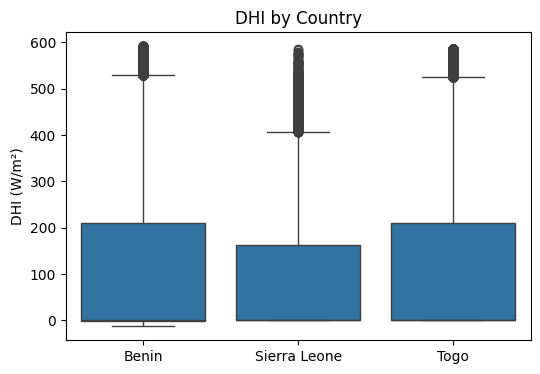

In [3]:
metrics = ['GHI', 'DNI', 'DHI']

for m in metrics:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='country', y=m, data=df)
    plt.title(f'{m} by Country')
    plt.xlabel('')
    plt.ylabel(f'{m} (W/m²)')
    plt.show()


In [4]:
stats_df = (
    df.groupby('country')[metrics]
      .agg(['mean','median','std'])
      .round(2)
)

# Flatten columns
stats_df.columns = ['_'.join(col) for col in stats_df.columns]
stats_df.reset_index(inplace=True)
stats_df


,country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.34,1.8,330.87,167.19,-0.1,261.71,110.90,0.5,152.92
1,Sierra Leone,239.07,-1.3,325.04,225.84,0.0,303.61,85.63,0.0,112.81
2,Togo,229.83,2.0,321.64,149.37,0.0,248.55,112.40,1.8,151.30


In [5]:

f_stat, p_val = stats.f_oneway(
    benin['GHI'], sierra['GHI'], togo['GHI']
)
print(f'ANOVA GHI: F={f_stat:.2f}, p={p_val:.3f}')


ANOVA GHI: F=142.93, p=0.000


Benin’s GHI leads the group with a mean of 240.3 W/m²—the highest of the three—but also the greatest variability (σ = 330.9 W/m²), indicating strong but uneven solar irradiation.

Sierra Leone stands out for direct irradiance, posting the highest average DNI at 225.8 W/m², yet it has the lowest mean DHI (85.6 W/m²), which suggests predominantly clear‐sky (direct‐sun) conditions ideal for concentrating solar technologies.

Togo shows the most diffuse sunlight, with the highest mean DHI of 112.4 W/m² despite having the lowest GHI mean (229.8 W/m²). And since a one‐way ANOVA on GHI gives F = 142.93, p < 0.001, these differences in horizontal irradiance across countries are statistically significant.

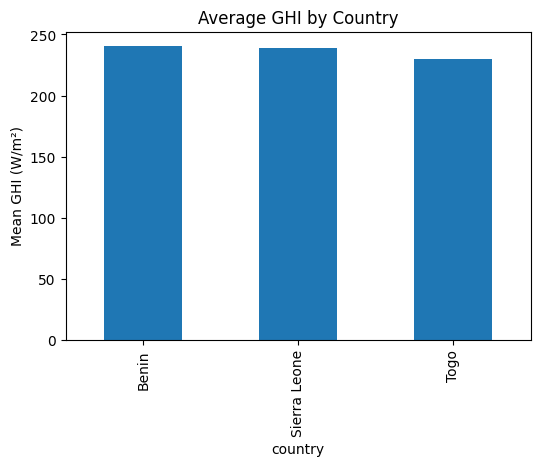

In [6]:
avg_ghi = df.groupby('country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', figsize=(6,4))
plt.title('Average GHI by Country')
plt.ylabel('Mean GHI (W/m²)')
plt.show()
